In [1]:
from __future__ import print_function
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import StepLR

In [3]:
from model import Net2
from train import train
from test import test
from config import ModelConfig
from utils import *
from data.data_engine import DataEngine

In [4]:
# View model config
args = ModelConfig()
args.dropout_value = 0.0
args.print_config()

Model Parameters:
{ 'batch_size_cpu': 64,
  'batch_size_cuda': 64,
  'dropout_value': 0.5,
  'epochs': 50,
  'num_workers': 4,
  'seed': 1}


Files already downloaded and verified
Files already downloaded and verified


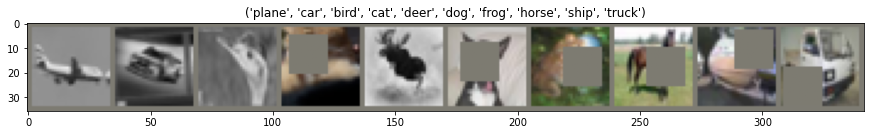

In [5]:
data = DataEngine(args)
data.show_samples()

In [6]:

train_loader = data.train_loader

test_loader = data.test_loader

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

#dict to store model loss and accuracy parameters
history = {}

CUDA Available? True


In [7]:
temp = Net2(args).to(device)
summary(temp, 
        (3, 32, 32),)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 16, 16]           9,216
             ReLU-14           [-1, 32,

In [8]:
# Input parameters for the model
EPOCHS = 100
l1_decay=0.000
l2_decay=0.0
#norm_type = "BN"
#num_groups=2
#input_img_size=(1, 28, 28)


# Run model for first 20 epochs with high rate, and half it thereafter
model = Net2(args).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=25, gamma=0.5)

# run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
misclassified_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list)
    print("\nlearning rate", optimizer.param_groups[0]['lr'])
    scheduler.step()
    # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
    test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, classes, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

name = 'Net2'
history[name] = {}
history[name]['train_loss'] = train_loss_list
history[name]['train_accuracy'] = train_accuracy_list
history[name]['test_loss'] = test_loss_list
history[name]['test_accuracy'] = test_accuracy_list
history[name]['misclassified_imgs'] = misclassified_imgs

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=2.3074564933776855 Batch_id=781 Accuracy=20.62: 100%|██████████| 782/782 [00:08<00:00, 90.55it/s]

length of Average loss 782, length of Average accuracy 782

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0281, Accuracy: 3299/10000 (32.99%)

EPOCH: 2


Loss=1.8558460474014282 Batch_id=781 Accuracy=30.16: 100%|██████████| 782/782 [00:08<00:00, 91.80it/s]

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0252, Accuracy: 4107/10000 (41.07%)

EPOCH: 3


Loss=1.581339716911316 Batch_id=781 Accuracy=33.98: 100%|██████████| 782/782 [00:08<00:00, 91.44it/s] 

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0239, Accuracy: 4306/10000 (43.06%)

EPOCH: 4


Loss=1.7806223630905151 Batch_id=781 Accuracy=35.99: 100%|██████████| 782/782 [00:08<00:00, 90.95it/s]

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0231, Accuracy: 4517/10000 (45.17%)

EPOCH: 5


Loss=1.8397445678710938 Batch_id=781 Accuracy=37.21: 100%|██████████| 782/782 [00:08<00:00, 90.84it/s]

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0225, Accuracy: 4687/10000 (46.87%)

EPOCH: 6


Loss=1.8762823343276978 Batch_id=781 Accuracy=39.04: 100%|██████████| 782/782 [00:08<00:00, 91.17it/s]

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0241, Accuracy: 4476/10000 (44.76%)

EPOCH: 7


Loss=1.1706445217132568 Batch_id=781 Accuracy=40.18: 100%|██████████| 782/782 [00:08<00:00, 90.79it/s]

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0237, Accuracy: 4597/10000 (45.97%)

EPOCH: 8


Loss=1.5940862894058228 Batch_id=781 Accuracy=41.44: 100%|██████████| 782/782 [00:08<00:00, 91.02it/s]

length of Average loss 6256, length of Average accuracy 6256

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0218, Accuracy: 4870/10000 (48.70%)

EPOCH: 9


Loss=1.6970839500427246 Batch_id=781 Accuracy=42.61: 100%|██████████| 782/782 [00:08<00:00, 90.56it/s]

length of Average loss 7038, length of Average accuracy 7038

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0220, Accuracy: 4736/10000 (47.36%)

EPOCH: 10


Loss=1.600428581237793 Batch_id=781 Accuracy=43.79: 100%|██████████| 782/782 [00:08<00:00, 90.87it/s] 

length of Average loss 7820, length of Average accuracy 7820

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0209, Accuracy: 5017/10000 (50.17%)

EPOCH: 11


Loss=1.2635282278060913 Batch_id=781 Accuracy=44.78: 100%|██████████| 782/782 [00:08<00:00, 90.90it/s]

length of Average loss 8602, length of Average accuracy 8602

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0213, Accuracy: 5088/10000 (50.88%)

EPOCH: 12


Loss=1.5697031021118164 Batch_id=781 Accuracy=45.80: 100%|██████████| 782/782 [00:08<00:00, 90.43it/s]

length of Average loss 9384, length of Average accuracy 9384

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0205, Accuracy: 5304/10000 (53.04%)

EPOCH: 13


Loss=1.2893612384796143 Batch_id=781 Accuracy=46.23: 100%|██████████| 782/782 [00:08<00:00, 91.37it/s]

length of Average loss 10166, length of Average accuracy 10166

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0197, Accuracy: 5459/10000 (54.59%)

EPOCH: 14


Loss=1.4649826288223267 Batch_id=781 Accuracy=47.38: 100%|██████████| 782/782 [00:08<00:00, 91.09it/s]

length of Average loss 10948, length of Average accuracy 10948

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0214, Accuracy: 5233/10000 (52.33%)

EPOCH: 15


Loss=1.9889380931854248 Batch_id=781 Accuracy=47.92: 100%|██████████| 782/782 [00:08<00:00, 90.70it/s]

length of Average loss 11730, length of Average accuracy 11730

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0214, Accuracy: 5096/10000 (50.96%)

EPOCH: 16


Loss=1.2406392097473145 Batch_id=781 Accuracy=48.64: 100%|██████████| 782/782 [00:08<00:00, 91.38it/s]

length of Average loss 12512, length of Average accuracy 12512

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0187, Accuracy: 5661/10000 (56.61%)

EPOCH: 17


Loss=2.019286632537842 Batch_id=781 Accuracy=49.41: 100%|██████████| 782/782 [00:08<00:00, 90.54it/s] 

length of Average loss 13294, length of Average accuracy 13294

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0202, Accuracy: 5356/10000 (53.56%)

EPOCH: 18


Loss=1.6536493301391602 Batch_id=781 Accuracy=49.59: 100%|██████████| 782/782 [00:08<00:00, 90.34it/s]

length of Average loss 14076, length of Average accuracy 14076

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0197, Accuracy: 5578/10000 (55.78%)

EPOCH: 19


Loss=1.1438907384872437 Batch_id=781 Accuracy=49.88: 100%|██████████| 782/782 [00:08<00:00, 90.97it/s]

length of Average loss 14858, length of Average accuracy 14858

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0181, Accuracy: 5898/10000 (58.98%)

EPOCH: 20


Loss=0.9413132667541504 Batch_id=781 Accuracy=50.43: 100%|██████████| 782/782 [00:08<00:00, 90.89it/s]

length of Average loss 15640, length of Average accuracy 15640

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0171, Accuracy: 6085/10000 (60.85%)

EPOCH: 21


Loss=1.3179070949554443 Batch_id=781 Accuracy=51.04: 100%|██████████| 782/782 [00:08<00:00, 91.27it/s]

length of Average loss 16422, length of Average accuracy 16422

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 5895/10000 (58.95%)

EPOCH: 22


Loss=1.1053223609924316 Batch_id=781 Accuracy=50.88: 100%|██████████| 782/782 [00:08<00:00, 91.14it/s]

length of Average loss 17204, length of Average accuracy 17204

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 5888/10000 (58.88%)

EPOCH: 23


Loss=1.544243574142456 Batch_id=781 Accuracy=51.30: 100%|██████████| 782/782 [00:08<00:00, 91.07it/s] 

length of Average loss 17986, length of Average accuracy 17986

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0177, Accuracy: 5983/10000 (59.83%)

EPOCH: 24


Loss=1.9936342239379883 Batch_id=781 Accuracy=51.60: 100%|██████████| 782/782 [00:08<00:00, 90.88it/s]

length of Average loss 18768, length of Average accuracy 18768

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0166, Accuracy: 6203/10000 (62.03%)

EPOCH: 25


Loss=1.2353847026824951 Batch_id=781 Accuracy=51.84: 100%|██████████| 782/782 [00:08<00:00, 90.95it/s]

length of Average loss 19550, length of Average accuracy 19550

learning rate 0.01



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0168, Accuracy: 6104/10000 (61.04%)

EPOCH: 26


Loss=1.5435069799423218 Batch_id=781 Accuracy=53.02: 100%|██████████| 782/782 [00:08<00:00, 90.60it/s]

length of Average loss 20332, length of Average accuracy 20332

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0165, Accuracy: 6217/10000 (62.17%)

EPOCH: 27


Loss=1.0089143514633179 Batch_id=781 Accuracy=53.24: 100%|██████████| 782/782 [00:08<00:00, 91.17it/s]

length of Average loss 21114, length of Average accuracy 21114

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0175, Accuracy: 6071/10000 (60.71%)

EPOCH: 28


Loss=1.2070677280426025 Batch_id=781 Accuracy=53.34: 100%|██████████| 782/782 [00:08<00:00, 90.87it/s]

length of Average loss 21896, length of Average accuracy 21896

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0169, Accuracy: 6181/10000 (61.81%)

EPOCH: 29


Loss=1.1053380966186523 Batch_id=781 Accuracy=53.64: 100%|██████████| 782/782 [00:08<00:00, 90.68it/s]

length of Average loss 22678, length of Average accuracy 22678

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0171, Accuracy: 6124/10000 (61.24%)

EPOCH: 30


Loss=1.0775753259658813 Batch_id=781 Accuracy=53.65: 100%|██████████| 782/782 [00:08<00:00, 91.11it/s]

length of Average loss 23460, length of Average accuracy 23460

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0172, Accuracy: 6132/10000 (61.32%)

EPOCH: 31


Loss=1.2530044317245483 Batch_id=781 Accuracy=53.84: 100%|██████████| 782/782 [00:08<00:00, 90.64it/s]

length of Average loss 24242, length of Average accuracy 24242

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0167, Accuracy: 6244/10000 (62.44%)

EPOCH: 32


Loss=1.3119466304779053 Batch_id=781 Accuracy=53.74: 100%|██████████| 782/782 [00:08<00:00, 91.32it/s]

length of Average loss 25024, length of Average accuracy 25024

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0168, Accuracy: 6170/10000 (61.70%)

EPOCH: 33


Loss=1.2001292705535889 Batch_id=781 Accuracy=53.76: 100%|██████████| 782/782 [00:08<00:00, 90.89it/s]

length of Average loss 25806, length of Average accuracy 25806

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0165, Accuracy: 6274/10000 (62.74%)

EPOCH: 34


Loss=1.4777154922485352 Batch_id=781 Accuracy=54.14: 100%|██████████| 782/782 [00:08<00:00, 91.03it/s]

length of Average loss 26588, length of Average accuracy 26588

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0161, Accuracy: 6296/10000 (62.96%)

EPOCH: 35


Loss=0.98094242811203 Batch_id=781 Accuracy=54.41: 100%|██████████| 782/782 [00:08<00:00, 90.87it/s]  

length of Average loss 27370, length of Average accuracy 27370

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0165, Accuracy: 6257/10000 (62.57%)

EPOCH: 36


Loss=0.9536964893341064 Batch_id=781 Accuracy=54.26: 100%|██████████| 782/782 [00:08<00:00, 90.83it/s]

length of Average loss 28152, length of Average accuracy 28152

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0168, Accuracy: 6218/10000 (62.18%)

EPOCH: 37


Loss=1.3946675062179565 Batch_id=781 Accuracy=54.47: 100%|██████████| 782/782 [00:08<00:00, 91.02it/s]

length of Average loss 28934, length of Average accuracy 28934

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0173, Accuracy: 6137/10000 (61.37%)

EPOCH: 38


Loss=1.2521793842315674 Batch_id=781 Accuracy=54.73: 100%|██████████| 782/782 [00:08<00:00, 90.93it/s]

length of Average loss 29716, length of Average accuracy 29716

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6417/10000 (64.17%)

EPOCH: 39


Loss=1.4056119918823242 Batch_id=781 Accuracy=54.58: 100%|██████████| 782/782 [00:08<00:00, 90.31it/s]

length of Average loss 30498, length of Average accuracy 30498

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0163, Accuracy: 6262/10000 (62.62%)

EPOCH: 40


Loss=1.2666751146316528 Batch_id=781 Accuracy=54.67: 100%|██████████| 782/782 [00:08<00:00, 90.20it/s]

length of Average loss 31280, length of Average accuracy 31280

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 6022/10000 (60.22%)

EPOCH: 41


Loss=0.8778014183044434 Batch_id=781 Accuracy=54.80: 100%|██████████| 782/782 [00:08<00:00, 90.16it/s]

length of Average loss 32062, length of Average accuracy 32062

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0161, Accuracy: 6345/10000 (63.45%)

EPOCH: 42


Loss=2.1197237968444824 Batch_id=781 Accuracy=54.67: 100%|██████████| 782/782 [00:08<00:00, 90.18it/s]

length of Average loss 32844, length of Average accuracy 32844

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6404/10000 (64.04%)

EPOCH: 43


Loss=1.0589309930801392 Batch_id=781 Accuracy=55.27: 100%|██████████| 782/782 [00:08<00:00, 90.27it/s]

length of Average loss 33626, length of Average accuracy 33626

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0166, Accuracy: 6250/10000 (62.50%)

EPOCH: 44


Loss=1.2651159763336182 Batch_id=781 Accuracy=55.48: 100%|██████████| 782/782 [00:08<00:00, 90.53it/s]

length of Average loss 34408, length of Average accuracy 34408

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6316/10000 (63.16%)

EPOCH: 45


Loss=1.5570064783096313 Batch_id=781 Accuracy=55.16: 100%|██████████| 782/782 [00:08<00:00, 90.14it/s]

length of Average loss 35190, length of Average accuracy 35190

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0167, Accuracy: 6310/10000 (63.10%)

EPOCH: 46


Loss=1.1303058862686157 Batch_id=781 Accuracy=55.26: 100%|██████████| 782/782 [00:08<00:00, 90.29it/s]

length of Average loss 35972, length of Average accuracy 35972

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0161, Accuracy: 6313/10000 (63.13%)

EPOCH: 47


Loss=1.4618089199066162 Batch_id=781 Accuracy=55.28: 100%|██████████| 782/782 [00:08<00:00, 89.81it/s]

length of Average loss 36754, length of Average accuracy 36754

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0166, Accuracy: 6240/10000 (62.40%)

EPOCH: 48


Loss=1.1803827285766602 Batch_id=781 Accuracy=55.34: 100%|██████████| 782/782 [00:08<00:00, 89.91it/s]

length of Average loss 37536, length of Average accuracy 37536

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6394/10000 (63.94%)

EPOCH: 49


Loss=1.93052339553833 Batch_id=781 Accuracy=55.48: 100%|██████████| 782/782 [00:08<00:00, 90.24it/s]  

length of Average loss 38318, length of Average accuracy 38318

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6437/10000 (64.37%)

EPOCH: 50


Loss=1.4018338918685913 Batch_id=781 Accuracy=55.99: 100%|██████████| 782/782 [00:08<00:00, 90.23it/s]

length of Average loss 39100, length of Average accuracy 39100

learning rate 0.005



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0161, Accuracy: 6384/10000 (63.84%)

EPOCH: 51


Loss=1.5559905767440796 Batch_id=781 Accuracy=56.09: 100%|██████████| 782/782 [00:08<00:00, 89.56it/s]

length of Average loss 39882, length of Average accuracy 39882

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6410/10000 (64.10%)

EPOCH: 52


Loss=1.3485360145568848 Batch_id=781 Accuracy=56.01: 100%|██████████| 782/782 [00:08<00:00, 90.34it/s]

length of Average loss 40664, length of Average accuracy 40664

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0155, Accuracy: 6463/10000 (64.63%)

EPOCH: 53


Loss=1.0470222234725952 Batch_id=781 Accuracy=56.15: 100%|██████████| 782/782 [00:08<00:00, 90.22it/s]

length of Average loss 41446, length of Average accuracy 41446

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6510/10000 (65.10%)

EPOCH: 54


Loss=2.232078790664673 Batch_id=781 Accuracy=56.34: 100%|██████████| 782/782 [00:08<00:00, 90.25it/s] 

length of Average loss 42228, length of Average accuracy 42228

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6401/10000 (64.01%)

EPOCH: 55


Loss=0.9040447473526001 Batch_id=781 Accuracy=55.98: 100%|██████████| 782/782 [00:08<00:00, 90.21it/s]


length of Average loss 43010, length of Average accuracy 43010

learning rate 0.0025


  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6367/10000 (63.67%)

EPOCH: 56


Loss=1.0724740028381348 Batch_id=781 Accuracy=56.09: 100%|██████████| 782/782 [00:08<00:00, 90.25it/s]

length of Average loss 43792, length of Average accuracy 43792

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6452/10000 (64.52%)

EPOCH: 57


Loss=0.7417697906494141 Batch_id=781 Accuracy=56.36: 100%|██████████| 782/782 [00:08<00:00, 90.55it/s]

length of Average loss 44574, length of Average accuracy 44574

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6395/10000 (63.95%)

EPOCH: 58


Loss=0.9737955927848816 Batch_id=781 Accuracy=56.58: 100%|██████████| 782/782 [00:08<00:00, 89.93it/s]

length of Average loss 45356, length of Average accuracy 45356

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0155, Accuracy: 6485/10000 (64.85%)

EPOCH: 59


Loss=1.4310967922210693 Batch_id=781 Accuracy=56.26: 100%|██████████| 782/782 [00:08<00:00, 89.83it/s]

length of Average loss 46138, length of Average accuracy 46138

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6372/10000 (63.72%)

EPOCH: 60


Loss=1.342850685119629 Batch_id=781 Accuracy=56.41: 100%|██████████| 782/782 [00:08<00:00, 89.93it/s] 

length of Average loss 46920, length of Average accuracy 46920

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6424/10000 (64.24%)

EPOCH: 61


Loss=1.3700813055038452 Batch_id=781 Accuracy=56.71: 100%|██████████| 782/782 [00:08<00:00, 90.18it/s]

length of Average loss 47702, length of Average accuracy 47702

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0155, Accuracy: 6508/10000 (65.08%)

EPOCH: 62


Loss=1.193483591079712 Batch_id=781 Accuracy=56.48: 100%|██████████| 782/782 [00:08<00:00, 90.13it/s] 

length of Average loss 48484, length of Average accuracy 48484

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6364/10000 (63.64%)

EPOCH: 63


Loss=1.0951136350631714 Batch_id=781 Accuracy=56.58: 100%|██████████| 782/782 [00:08<00:00, 90.10it/s]

length of Average loss 49266, length of Average accuracy 49266

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0165, Accuracy: 6285/10000 (62.85%)

EPOCH: 64


Loss=1.8388338088989258 Batch_id=781 Accuracy=56.78: 100%|██████████| 782/782 [00:08<00:00, 89.75it/s]

length of Average loss 50048, length of Average accuracy 50048

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6366/10000 (63.66%)

EPOCH: 65


Loss=1.0253435373306274 Batch_id=781 Accuracy=56.57: 100%|██████████| 782/782 [00:08<00:00, 89.75it/s]

length of Average loss 50830, length of Average accuracy 50830

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6523/10000 (65.23%)

EPOCH: 66


Loss=1.0484718084335327 Batch_id=781 Accuracy=56.77: 100%|██████████| 782/782 [00:08<00:00, 88.57it/s]

length of Average loss 51612, length of Average accuracy 51612

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0150, Accuracy: 6586/10000 (65.86%)

EPOCH: 67


Loss=0.990225076675415 Batch_id=781 Accuracy=56.97: 100%|██████████| 782/782 [00:08<00:00, 89.56it/s] 

length of Average loss 52394, length of Average accuracy 52394

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6537/10000 (65.37%)

EPOCH: 68


Loss=1.0091938972473145 Batch_id=781 Accuracy=56.79: 100%|██████████| 782/782 [00:08<00:00, 89.55it/s]

length of Average loss 53176, length of Average accuracy 53176

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6519/10000 (65.19%)

EPOCH: 69


Loss=1.146984577178955 Batch_id=781 Accuracy=56.95: 100%|██████████| 782/782 [00:08<00:00, 89.97it/s] 

length of Average loss 53958, length of Average accuracy 53958

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6454/10000 (64.54%)

EPOCH: 70


Loss=1.7486783266067505 Batch_id=781 Accuracy=56.65: 100%|██████████| 782/782 [00:08<00:00, 90.23it/s]

length of Average loss 54740, length of Average accuracy 54740

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6487/10000 (64.87%)

EPOCH: 71


Loss=1.1164419651031494 Batch_id=781 Accuracy=56.87: 100%|██████████| 782/782 [00:08<00:00, 90.02it/s]

length of Average loss 55522, length of Average accuracy 55522

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6514/10000 (65.14%)

EPOCH: 72


Loss=1.1455750465393066 Batch_id=781 Accuracy=56.94: 100%|██████████| 782/782 [00:08<00:00, 90.68it/s]

length of Average loss 56304, length of Average accuracy 56304

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6339/10000 (63.39%)

EPOCH: 73


Loss=1.2919851541519165 Batch_id=781 Accuracy=56.85: 100%|██████████| 782/782 [00:08<00:00, 89.61it/s]

length of Average loss 57086, length of Average accuracy 57086

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6323/10000 (63.23%)

EPOCH: 74


Loss=1.0342782735824585 Batch_id=781 Accuracy=57.24: 100%|██████████| 782/782 [00:08<00:00, 89.93it/s]

length of Average loss 57868, length of Average accuracy 57868

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6352/10000 (63.52%)

EPOCH: 75


Loss=1.1655954122543335 Batch_id=781 Accuracy=57.14: 100%|██████████| 782/782 [00:08<00:00, 89.67it/s]

length of Average loss 58650, length of Average accuracy 58650

learning rate 0.0025



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6402/10000 (64.02%)

EPOCH: 76


Loss=1.4967821836471558 Batch_id=781 Accuracy=57.06: 100%|██████████| 782/782 [00:08<00:00, 90.00it/s]

length of Average loss 59432, length of Average accuracy 59432

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6579/10000 (65.79%)

EPOCH: 77


Loss=1.424880027770996 Batch_id=781 Accuracy=57.17: 100%|██████████| 782/782 [00:08<00:00, 90.08it/s] 

length of Average loss 60214, length of Average accuracy 60214

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6428/10000 (64.28%)

EPOCH: 78


Loss=1.451521873474121 Batch_id=781 Accuracy=57.66: 100%|██████████| 782/782 [00:08<00:00, 90.13it/s] 

length of Average loss 60996, length of Average accuracy 60996

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0162, Accuracy: 6346/10000 (63.46%)

EPOCH: 79


Loss=1.5891591310501099 Batch_id=781 Accuracy=57.09: 100%|██████████| 782/782 [00:08<00:00, 89.81it/s]

length of Average loss 61778, length of Average accuracy 61778

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6452/10000 (64.52%)

EPOCH: 80


Loss=1.3964141607284546 Batch_id=781 Accuracy=57.50: 100%|██████████| 782/782 [00:08<00:00, 90.13it/s]

length of Average loss 62560, length of Average accuracy 62560

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6442/10000 (64.42%)

EPOCH: 81


Loss=1.5180859565734863 Batch_id=781 Accuracy=57.15: 100%|██████████| 782/782 [00:08<00:00, 89.56it/s]

length of Average loss 63342, length of Average accuracy 63342

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6449/10000 (64.49%)

EPOCH: 82


Loss=2.027230739593506 Batch_id=781 Accuracy=57.45: 100%|██████████| 782/782 [00:08<00:00, 90.10it/s] 

length of Average loss 64124, length of Average accuracy 64124

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0151, Accuracy: 6598/10000 (65.98%)

EPOCH: 83


Loss=1.4727188348770142 Batch_id=781 Accuracy=57.11: 100%|██████████| 782/782 [00:08<00:00, 90.05it/s]

length of Average loss 64906, length of Average accuracy 64906

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6446/10000 (64.46%)

EPOCH: 84


Loss=0.6877419948577881 Batch_id=781 Accuracy=57.43: 100%|██████████| 782/782 [00:08<00:00, 90.13it/s]

length of Average loss 65688, length of Average accuracy 65688

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6390/10000 (63.90%)

EPOCH: 85


Loss=0.952377200126648 Batch_id=781 Accuracy=57.45: 100%|██████████| 782/782 [00:08<00:00, 90.17it/s] 

length of Average loss 66470, length of Average accuracy 66470

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6539/10000 (65.39%)

EPOCH: 86


Loss=1.566474199295044 Batch_id=781 Accuracy=57.45: 100%|██████████| 782/782 [00:08<00:00, 89.83it/s] 

length of Average loss 67252, length of Average accuracy 67252

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6393/10000 (63.93%)

EPOCH: 87


Loss=1.1544227600097656 Batch_id=781 Accuracy=57.64: 100%|██████████| 782/782 [00:08<00:00, 89.78it/s]

length of Average loss 68034, length of Average accuracy 68034

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6504/10000 (65.04%)

EPOCH: 88


Loss=1.2792346477508545 Batch_id=781 Accuracy=57.22: 100%|██████████| 782/782 [00:08<00:00, 89.90it/s]

length of Average loss 68816, length of Average accuracy 68816

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0151, Accuracy: 6536/10000 (65.36%)

EPOCH: 89


Loss=1.8548721075057983 Batch_id=781 Accuracy=57.44: 100%|██████████| 782/782 [00:08<00:00, 89.98it/s]

length of Average loss 69598, length of Average accuracy 69598

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6500/10000 (65.00%)

EPOCH: 90


Loss=1.082131266593933 Batch_id=781 Accuracy=57.63: 100%|██████████| 782/782 [00:08<00:00, 89.75it/s] 

length of Average loss 70380, length of Average accuracy 70380

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0149, Accuracy: 6616/10000 (66.16%)

EPOCH: 91


Loss=1.3848506212234497 Batch_id=781 Accuracy=57.36: 100%|██████████| 782/782 [00:08<00:00, 90.29it/s]

length of Average loss 71162, length of Average accuracy 71162

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6476/10000 (64.76%)

EPOCH: 92


Loss=1.369760274887085 Batch_id=781 Accuracy=57.47: 100%|██████████| 782/782 [00:08<00:00, 90.28it/s] 

length of Average loss 71944, length of Average accuracy 71944

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6520/10000 (65.20%)

EPOCH: 93


Loss=1.2371419668197632 Batch_id=781 Accuracy=57.30: 100%|██████████| 782/782 [00:08<00:00, 90.39it/s]

length of Average loss 72726, length of Average accuracy 72726

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6509/10000 (65.09%)

EPOCH: 94


Loss=1.8513327836990356 Batch_id=781 Accuracy=57.04: 100%|██████████| 782/782 [00:08<00:00, 90.08it/s]

length of Average loss 73508, length of Average accuracy 73508

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0154, Accuracy: 6489/10000 (64.89%)

EPOCH: 95


Loss=1.3160415887832642 Batch_id=781 Accuracy=57.43: 100%|██████████| 782/782 [00:08<00:00, 90.25it/s]

length of Average loss 74290, length of Average accuracy 74290

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6400/10000 (64.00%)

EPOCH: 96


Loss=0.9743091464042664 Batch_id=781 Accuracy=57.98: 100%|██████████| 782/782 [00:08<00:00, 90.13it/s]

length of Average loss 75072, length of Average accuracy 75072

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0155, Accuracy: 6505/10000 (65.05%)

EPOCH: 97


Loss=0.9775465726852417 Batch_id=781 Accuracy=57.78: 100%|██████████| 782/782 [00:08<00:00, 89.59it/s]

length of Average loss 75854, length of Average accuracy 75854

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0150, Accuracy: 6614/10000 (66.14%)

EPOCH: 98


Loss=1.202549695968628 Batch_id=781 Accuracy=57.68: 100%|██████████| 782/782 [00:08<00:00, 90.16it/s] 

length of Average loss 76636, length of Average accuracy 76636

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6550/10000 (65.50%)

EPOCH: 99


Loss=1.2863733768463135 Batch_id=781 Accuracy=57.94: 100%|██████████| 782/782 [00:08<00:00, 89.94it/s]

length of Average loss 77418, length of Average accuracy 77418

learning rate 0.00125



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6425/10000 (64.25%)

EPOCH: 100


Loss=1.0420122146606445 Batch_id=781 Accuracy=57.65: 100%|██████████| 782/782 [00:08<00:00, 90.26it/s]

length of Average loss 78200, length of Average accuracy 78200

learning rate 0.00125


Test set: Average loss: 0.0158, Accuracy: 6434/10000 (64.34%)



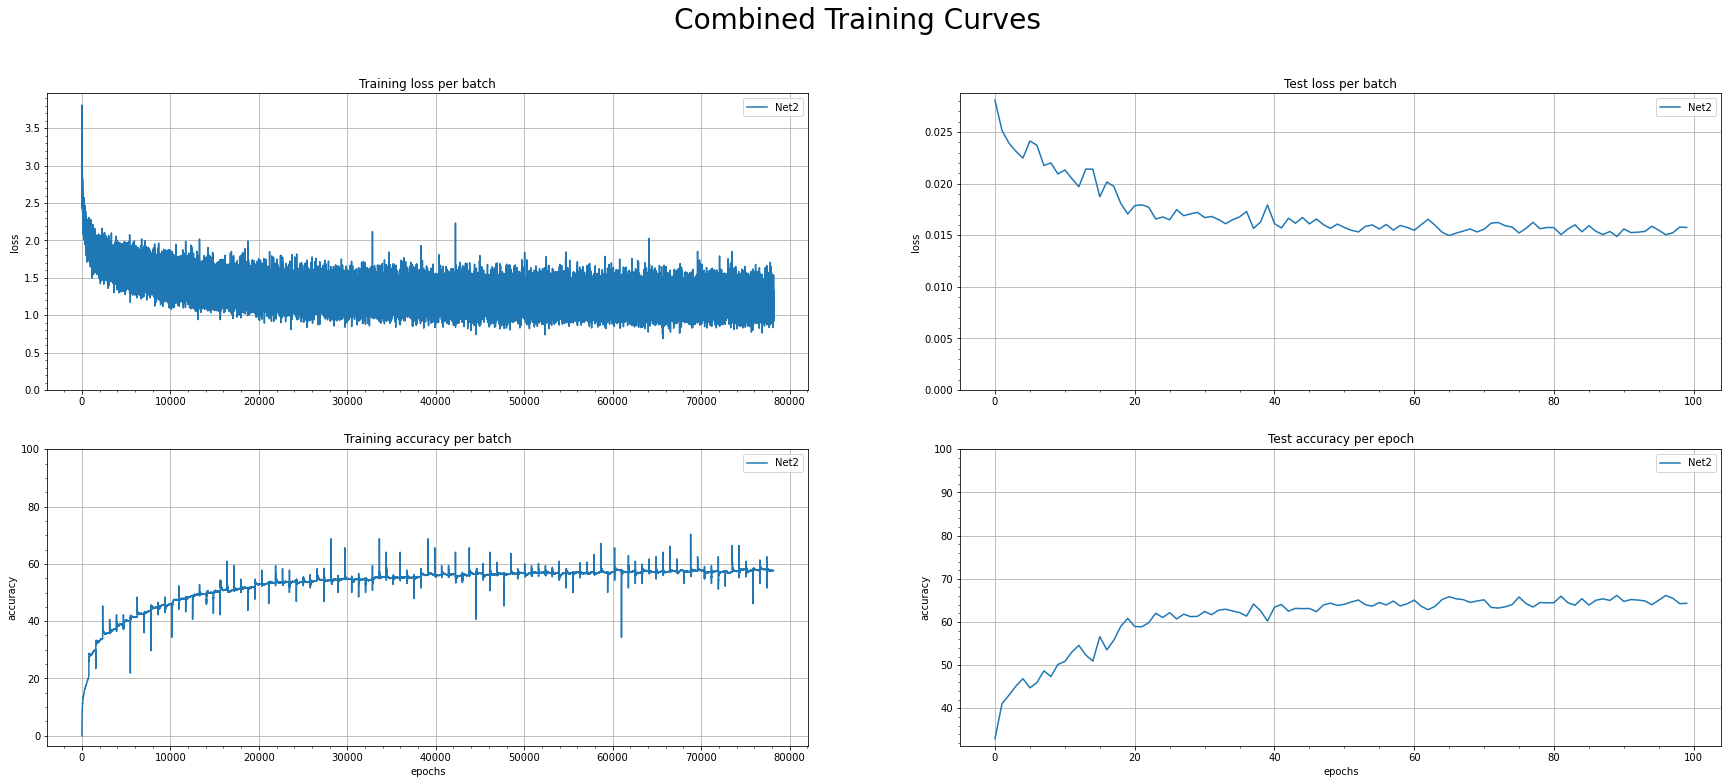

In [9]:
training_curves(history)

In [10]:
# Input parameters for the model
EPOCHS = 20
l1_decay=0.000
l2_decay=0.0
#norm_type = "BN"
#num_groups=2
#input_img_size=(1, 28, 28)


# Run model for first 20 epochs with high rate, and half it thereafter
#model = Net2(args).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = StepLR(optimizer, step_size=30, gamma=0.5)

# run_model(model, optimizer, scheduler, EPOCHS, l1=0.0, l2=0.0)

train_loss_list = []
train_accuracy_list = []
test_loss_list = []
test_accuracy_list = []
misclassified_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train_loss_list, train_accuracy_list = train(model, device, train_loader, criterion, optimizer, epoch, l1_decay, l2_decay, train_loss_list, train_accuracy_list)
    print("\nlearning rate", optimizer.param_groups[0]['lr'])
    scheduler.step()
    # test(model1, device, test_loader, test_losses, test_acc, misclassified_imgs, epoch==EPOCHS-1)
    test_loss_list, test_accuracy_list, misclassified_imgs = test(model, device, test_loader, criterion, classes, test_loss_list, test_accuracy_list, misclassified_imgs, epoch==EPOCHS-1)

name = 'Net2'
history[name] = {}
history[name]['train_loss'] = train_loss_list
history[name]['train_accuracy'] = train_accuracy_list
history[name]['test_loss'] = test_loss_list
history[name]['test_accuracy'] = test_accuracy_list
history[name]['misclassified_imgs'] = misclassified_imgs

  0%|          | 0/782 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.8769407868385315 Batch_id=781 Accuracy=57.82: 100%|██████████| 782/782 [00:08<00:00, 90.50it/s]

length of Average loss 782, length of Average accuracy 782

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6558/10000 (65.58%)

EPOCH: 2


Loss=0.8197643160820007 Batch_id=781 Accuracy=57.94: 100%|██████████| 782/782 [00:08<00:00, 89.71it/s]

length of Average loss 1564, length of Average accuracy 1564

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6591/10000 (65.91%)

EPOCH: 3


Loss=1.0525118112564087 Batch_id=781 Accuracy=57.83: 100%|██████████| 782/782 [00:08<00:00, 89.68it/s]

length of Average loss 2346, length of Average accuracy 2346

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6429/10000 (64.29%)

EPOCH: 4


Loss=1.7066422700881958 Batch_id=781 Accuracy=57.79: 100%|██████████| 782/782 [00:08<00:00, 89.38it/s]

length of Average loss 3128, length of Average accuracy 3128

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6531/10000 (65.31%)

EPOCH: 5


Loss=1.5882163047790527 Batch_id=781 Accuracy=57.79: 100%|██████████| 782/782 [00:08<00:00, 90.21it/s]

length of Average loss 3910, length of Average accuracy 3910

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6538/10000 (65.38%)

EPOCH: 6


Loss=1.4547901153564453 Batch_id=781 Accuracy=57.91: 100%|██████████| 782/782 [00:08<00:00, 89.53it/s]

length of Average loss 4692, length of Average accuracy 4692

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0159, Accuracy: 6422/10000 (64.22%)

EPOCH: 7


Loss=1.389988899230957 Batch_id=781 Accuracy=57.81: 100%|██████████| 782/782 [00:08<00:00, 90.34it/s] 

length of Average loss 5474, length of Average accuracy 5474

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0151, Accuracy: 6597/10000 (65.97%)

EPOCH: 8


Loss=1.0217344760894775 Batch_id=781 Accuracy=57.85: 100%|██████████| 782/782 [00:08<00:00, 89.84it/s]

length of Average loss 6256, length of Average accuracy 6256

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6536/10000 (65.36%)

EPOCH: 9


Loss=0.9276653528213501 Batch_id=781 Accuracy=57.74: 100%|██████████| 782/782 [00:08<00:00, 89.41it/s]

length of Average loss 7038, length of Average accuracy 7038

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0156, Accuracy: 6496/10000 (64.96%)

EPOCH: 10


Loss=0.7409042716026306 Batch_id=781 Accuracy=57.93: 100%|██████████| 782/782 [00:08<00:00, 89.92it/s]

length of Average loss 7820, length of Average accuracy 7820

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6551/10000 (65.51%)

EPOCH: 11


Loss=1.6416980028152466 Batch_id=781 Accuracy=57.60: 100%|██████████| 782/782 [00:08<00:00, 89.22it/s]

length of Average loss 8602, length of Average accuracy 8602

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6455/10000 (64.55%)

EPOCH: 12


Loss=1.323395013809204 Batch_id=781 Accuracy=57.95: 100%|██████████| 782/782 [00:08<00:00, 90.06it/s] 

length of Average loss 9384, length of Average accuracy 9384

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0153, Accuracy: 6541/10000 (65.41%)

EPOCH: 13


Loss=1.9111311435699463 Batch_id=781 Accuracy=57.65: 100%|██████████| 782/782 [00:08<00:00, 90.03it/s]

length of Average loss 10166, length of Average accuracy 10166

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0158, Accuracy: 6448/10000 (64.48%)

EPOCH: 14


Loss=1.3462506532669067 Batch_id=781 Accuracy=57.81: 100%|██████████| 782/782 [00:08<00:00, 90.07it/s]

length of Average loss 10948, length of Average accuracy 10948

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0160, Accuracy: 6383/10000 (63.83%)

EPOCH: 15


Loss=1.5826199054718018 Batch_id=781 Accuracy=57.75: 100%|██████████| 782/782 [00:08<00:00, 90.05it/s]

length of Average loss 11730, length of Average accuracy 11730

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0157, Accuracy: 6431/10000 (64.31%)

EPOCH: 16


Loss=1.100295066833496 Batch_id=781 Accuracy=57.91: 100%|██████████| 782/782 [00:08<00:00, 89.71it/s] 

length of Average loss 12512, length of Average accuracy 12512

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0149, Accuracy: 6599/10000 (65.99%)

EPOCH: 17


Loss=1.1518744230270386 Batch_id=781 Accuracy=57.98: 100%|██████████| 782/782 [00:08<00:00, 89.83it/s]

length of Average loss 13294, length of Average accuracy 13294

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0146, Accuracy: 6686/10000 (66.86%)

EPOCH: 18


Loss=1.0590012073516846 Batch_id=781 Accuracy=57.84: 100%|██████████| 782/782 [00:08<00:00, 90.15it/s]

length of Average loss 14076, length of Average accuracy 14076

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6553/10000 (65.53%)

EPOCH: 19


Loss=1.419005274772644 Batch_id=781 Accuracy=58.08: 100%|██████████| 782/782 [00:08<00:00, 89.94it/s] 

length of Average loss 14858, length of Average accuracy 14858

learning rate 0.001



  0%|          | 0/782 [00:00<?, ?it/s]

Test set: Average loss: 0.0152, Accuracy: 6569/10000 (65.69%)

EPOCH: 20


Loss=1.1494039297103882 Batch_id=781 Accuracy=57.95: 100%|██████████| 782/782 [00:08<00:00, 90.20it/s]

length of Average loss 15640, length of Average accuracy 15640

learning rate 0.001


Test set: Average loss: 0.0155, Accuracy: 6515/10000 (65.15%)



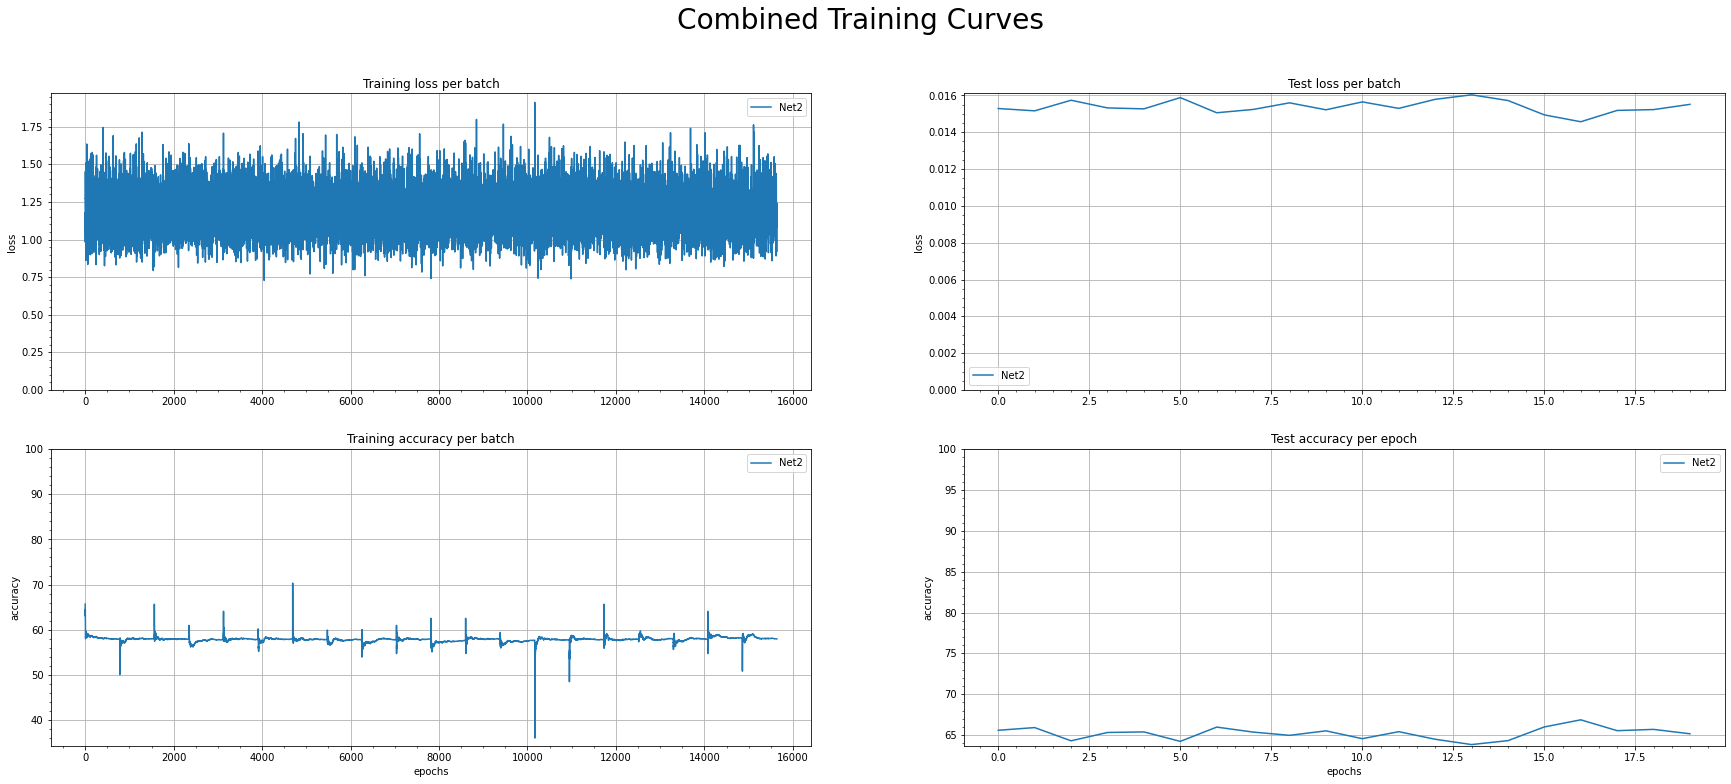

In [11]:
training_curves(history)

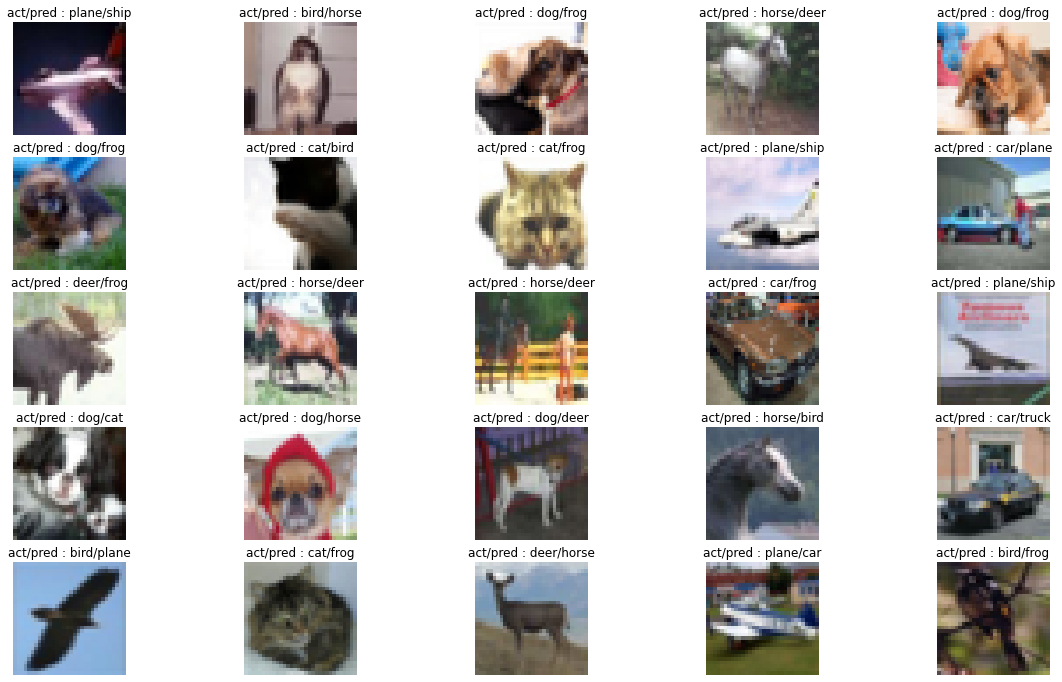

In [12]:
def imshow(img):
	img = denormalize(img)
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.grid(b=None)
	return img

#classes = data.classes

model.eval()

figure = plt.figure(figsize=(20, 12))
num_of_images = 25
index = 1

misclass_img_list = []
untrans_img=[]

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(
            device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        act = target.view_as(pred)
        # since most of the bool vec is true (good problem to have) and switch (flip) the true to false and vice versa
        bool_vec = ~pred.eq(act)

        # now extract the index number from the tensor which has 'true'
        idx = list(
            np.where(bool_vec.cpu().numpy())[0])

        if idx:  # if not a blank list
            idx_list = idx
            # print(data[idx_list[0]].shape)
            if index < num_of_images+1:
                plt.subplot(5, 5, index)
                plt.axis('off')
                titl = 'act/pred : ' + \
                    str(classes[target[idx[0]].cpu().item(
                    )]) + '/' + str(classes[pred[idx[0]].cpu().item()])
                # prints the 1st index of each batch.
            
                img = data[idx[0]].cpu()
                untrans_img.append(img)
                image = imshow(img)
                misclass_img_list.append(image)
                                  


                plt.title(titl)
                index += 1



In [13]:
from gradcam.visualize import VisualizeCam

target_layers = ["layer0", "layer1", "layer2", "layer3"]
viz_cam = VisualizeCam(model, classes, target_layers)

In [14]:
num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")

RuntimeError: Mismatch in shape: grad_output[0] has a shape of torch.Size([5, 10]) and output[0] has a shape of torch.Size([5, 40]).